# **YTD Crypto Analysis**

In [1]:
!pip install python-binance mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.9/288.9 kB 9.0 MB/s eta 0:00:00


## **Importing Dependencies**

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
from binance import Client
import mplfinance as mpf
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
#Instantiating Client
client = Client()

In [4]:
client?

In [5]:
client.get_historical_klines?

In [6]:
now=datetime.now()
#Function to get data from Binance using the binance library
def getdata(symbol, interval, start, end=datetime.strftime(now,"%Y-%m-%d")):
    df = pd.DataFrame(client.get_historical_klines(symbol, interval, start, end))
    #Selecting the first 5 columns of all the columns gotten
    df = df[[0,1,2,3,4]]
    #Remaning the first 5 columns
    df.columns = ["Date", "Open", "High", "Low", "Close"]
    #Changing the Date column from milliseconds to the appropriate datetime format
    df.Date = pd.to_datetime(df.Date, unit='ms')
    #Making the Date column the index
    df.set_index("Date", inplace=True)
    #Changing the remaining columns (apart for the Date column to float)
    df = df.astype(float)
    return df

In [7]:
#Using and testing the function
BTCUSDT_1D = getdata("BTCUSDT","1d", "2022-01-01")
BTCUSDT_1D.tail()

,Open,High,Low,Close
Date,,,,
2022-09-14,20173.62,20541.48,19617.62,20226.71
2022-09-15,20227.17,20330.24,19497.00,19701.88
2022-09-16,19701.88,19890.00,19320.01,19803.30
2022-09-17,19803.30,20189.00,19748.08,20113.62
2022-09-18,20112.61,20117.26,19949.95,19966.58


In [8]:
#Creating a list of crypto currencies to work with
crypto = ["BTCUSDT", "ETHUSDT", "BNBUSDT", "XRPUSDT", "TRXUSDT", "LTCUSDT", "SHIBUSDT", "SOLUSDT", "ADAUSDT", "DOGEUSDT", "MATICUSDT"]

In [9]:
#Testing the function on the list
getdata(crypto[5], "1d", "2022-01-01")

,Open,High,Low,Close
Date,,,,
2022-01-01,146.20,151.00,146.10,150.80
2022-01-02,150.80,153.40,147.80,151.20
2022-01-03,151.10,151.20,146.00,148.50
2022-01-04,148.40,151.70,145.20,146.50
2022-01-05,146.50,150.00,129.80,135.40
...,...,...,...,...
2022-09-14,59.09,61.18,58.13,60.18
2022-09-15,60.16,60.83,55.83,56.34
2022-09-16,56.35,56.97,54.61,55.95


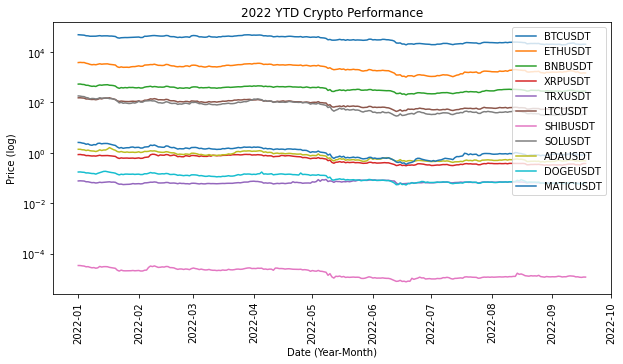

In [10]:
#Adjusting the size to contain the legends properly
plt.figure(figsize = (10,5))
#Standardizing the yaxis(Price)
plt.yscale("log")
#Looping through the crypto list to plot the lines
for i in crypto:
    plt.plot(getdata(i, "1d", "2022-01-01")["Close"])
    plt.title("2022 YTD Crypto Performance")
    plt.xlabel("Date (Year-Month)")
    plt.ylabel("Price (log)")
    plt.xticks(rotation=90)
    plt.legend(crypto, loc="upper right")

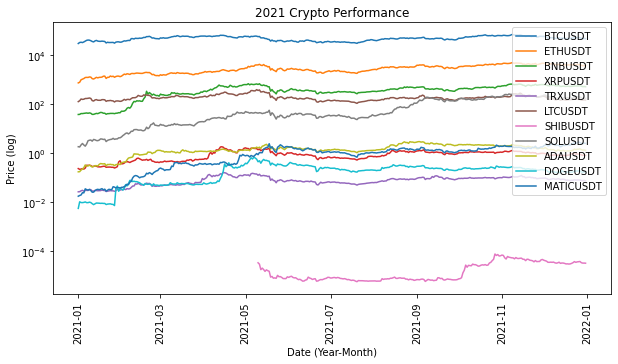

In [11]:
#Adjusting the size to contain the legends properly
plt.figure(figsize = (10,5))
#Standardizing the yaxis(Price)
plt.yscale("log")
#Looping through the crypto list to plot the lines
for i in crypto:
    plt.plot(getdata(i, "1d", "2021-01-01", "2021-12-31")["Close"])
    plt.title("2021 Crypto Performance")
    plt.xlabel("Date (Year-Month)")
    plt.ylabel("Price (log)")
    plt.xticks(rotation=90)
    plt.legend(crypto, loc="upper right")

From the chart above, the crypto market had much more movement in 2021 especially in currencies like SHIB, DOGE and SOL. Also notice that the price moves for most of these crypto currencies correlate.

In [12]:
#Loop to take the Close column of each data and join them on one table
metric = "Close"
colnames = []
first = True
#Looping through the crypto list
for i in crypto:
    #Applying the getdata function to all the items in the crypto list
    data = getdata(i, "1d", "2022-01-01")
    #If this is the first dataframe, perform the following actions
    if first:
        combined = data[[metric]].copy()
        colnames.append(i)
        combined.columns = colnames
        first = False
    else:
        combined = combined.join(data[metric])
        colnames.append(i)
        combined.columns = colnames

In [13]:
combined

,BTCUSDT,ETHUSDT,BNBUSDT,XRPUSDT,TRXUSDT,LTCUSDT,SHIBUSDT,SOLUSDT,ADAUSDT,DOGEUSDT,MATICUSDT
Date,,,,,,,,,,,
2022-01-01,47722.65,3765.54,527.3,0.8507,0.07660,150.80,0.000034,179.06,1.3800,0.17320,2.5720
2022-01-02,47286.18,3828.27,531.0,0.8586,0.07762,151.20,0.000034,176.35,1.3770,0.17450,2.5500
2022-01-03,46446.10,3765.89,511.9,0.8324,0.07705,148.50,0.000033,170.15,1.3190,0.17030,2.4320
2022-01-04,45832.01,3785.11,506.9,0.8228,0.07592,146.50,0.000032,167.72,1.3090,0.16840,2.3650
2022-01-05,43451.13,3540.63,474.1,0.7726,0.07112,135.40,0.000030,154.52,1.2300,0.15900,2.1820
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-14,20226.71,1638.39,279.3,0.3415,0.06162,60.18,0.000012,34.12,0.4809,0.06115,0.8645
2022-09-15,19701.88,1472.75,271.1,0.3261,0.06131,56.34,0.000012,33.07,0.4662,0.05860,0.8251
2022-09-16,19803.30,1433.90,274.9,0.3552,0.06132,55.95,0.000012,32.25,0.4746,0.06046,0.8069


In [14]:
#Creating a correlation table to see how prices of crypto affect each other
corr_df = combined.pct_change().corr()
corr_df


,BTCUSDT,ETHUSDT,BNBUSDT,XRPUSDT,TRXUSDT,LTCUSDT,SHIBUSDT,SOLUSDT,ADAUSDT,DOGEUSDT,MATICUSDT
BTCUSDT,1.000000,0.882031,0.833198,0.761271,0.598918,0.819228,0.625690,0.784089,0.763705,0.715002,0.774227
ETHUSDT,0.882031,1.000000,0.845681,0.758211,0.568823,0.836389,0.633541,0.829693,0.762092,0.710039,0.837107
BNBUSDT,0.833198,0.845681,1.000000,0.789612,0.630142,0.831977,0.700222,0.805505,0.767340,0.747458,0.826491
XRPUSDT,0.761271,0.758211,0.789612,1.000000,0.600051,0.814077,0.683078,0.764699,0.763393,0.711014,0.778267
TRXUSDT,0.598918,0.568823,0.630142,0.600051,1.000000,0.605744,0.555907,0.599031,0.620795,0.557418,0.568900
LTCUSDT,0.819228,0.836389,0.831977,0.814077,0.605744,1.000000,0.699360,0.808664,0.816308,0.757641,0.775098
SHIBUSDT,0.625690,0.633541,0.700222,0.683078,0.555907,0.699360,1.000000,0.670831,0.663288,0.749312,0.663231
SOLUSDT,0.784089,0.829693,0.805505,0.764699,0.599031,0.808664,0.670831,1.000000,0.783967,0.707769,0.808206
ADAUSDT,0.763705,0.762092,0.767340,0.763393,0.620795,0.816308,0.663288,0.783967,1.000000,0.710693,0.762915
DOGEUSDT,0.715002,0.710039,0.747458,0.711014,0.557418,0.757641,0.749312,0.707769,0.710693,1.000000,0.677740


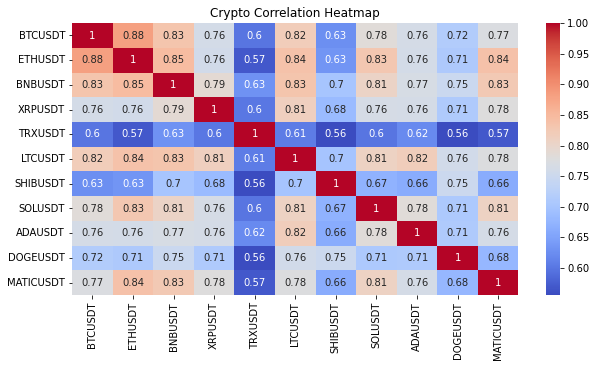

In [15]:
#Correlation Visualization
plt.figure(figsize = (10,5))
sns.heatmap(corr_df,annot=True, cmap="coolwarm")
plt.title("Crypto Correlation Heatmap");

This correlation heatmap shows just how strongly these currencies' movements correlate with each other with the strongest correlation being between BTC and ETH which is not surprising.

In [16]:
#Segmenting to just Bitcoin
BTCUSDT_1D["Return (%)"] = (BTCUSDT_1D["Close"].pct_change())*100

In [17]:
BTCUSDT_1D

,Open,High,Low,Close,Return (%)
Date,,,,,
2022-01-01,46216.93,47954.63,46208.37,47722.65,NaN
2022-01-02,47722.66,47990.00,46654.00,47286.18,-0.914597
2022-01-03,47286.18,47570.00,45696.00,46446.10,-1.776587
2022-01-04,46446.10,47557.54,45500.00,45832.01,-1.322156
2022-01-05,45832.01,47070.00,42500.00,43451.13,-5.194797
...,...,...,...,...,...
2022-09-14,20173.62,20541.48,19617.62,20226.71,0.263414
2022-09-15,20227.17,20330.24,19497.00,19701.88,-2.594737
2022-09-16,19701.88,19890.00,19320.01,19803.30,0.514773


In [18]:
BTCUSDT_1D.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2022-01-01 to 2022-09-18
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        261 non-null    float64
 1   High        261 non-null    float64
 2   Low         261 non-null    float64
 3   Close       261 non-null    float64
 4   Return (%)  260 non-null    float64
dtypes: float64(5)
memory usage: 12.2 KB


In [19]:
BTCUSDT_1D.describe()

,Open,High,Low,Close,Return (%)
count,261.000000,261.000000,261.000000,261.000000,260.000000
mean,32268.459617,33030.804789,31367.029962,32167.883678,-0.270466
std,9417.220915,9588.783737,9226.142299,9407.889964,3.570856
min,18790.610000,19458.250000,17622.000000,18790.610000,-15.379839
25%,22432.580000,22995.730000,21310.150000,22395.740000,-2.018978
50%,31734.230000,32399.000000,29944.100000,31373.100000,-0.197453
75%,41002.260000,41913.690000,39650.000000,40917.900000,1.474759
max,47722.660000,48189.840000,46950.850000,47722.650000,14.485583


In [20]:
BTCUSDT_2021 = getdata("BTCUSDT","1d", "2021-01-01", "2021-12-31")

In [21]:
BTCUSDT_2021.describe()

,Open,High,Low,Close
count,365.000000,365.000000,365.000000,365.000000
mean,47352.319562,48806.641726,45674.194219,47400.003041
std,9818.383868,9829.038454,9776.770493,9770.992384
min,28923.630000,29600.000000,28130.000000,29331.690000
25%,38207.040000,39780.000000,36161.950000,38290.240000
50%,47799.990000,49264.300000,46555.000000,47800.000000
75%,56150.010000,57777.000000,53950.000000,56150.010000
max,67525.820000,69000.000000,66222.400000,67525.830000


### Key insights to note from the description dataframe above:
* Bitcoin as dropped to as low as 18,791 USDT this year while its lowest price last year was about 29,332 USDT.
* Bitcoin's highest price this year is 19,803 USDT less than its highest price last year.
* Even with BTC's poor performance this year, the highest return in a day is not that far off from that of last year. The highest return in a day for this year is 14% while that of last year was 19%.
* The same can be said for the highest loss in a day, the differences between the two years are close at 15% for 2022 and 14% for 2021. 

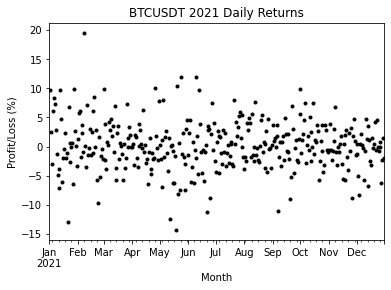

In [22]:
BTCUSDT_2021["Returns (%)"] = BTCUSDT_2021["Close"].pct_change()*100
BTCUSDT_2021["Returns (%)"].plot(
    style="k.",
    title="BTCUSDT 2021 Daily Returns",
    xlabel="Month",
    ylabel="Profit/Loss (%)"
);

<AxesSubplot:title={'center':'Average 50-day Returns'}, xlabel='Month', ylabel='Profit/Loss (%)'>

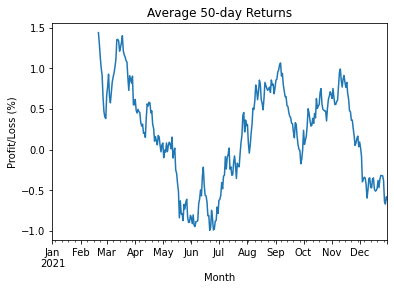

In [23]:
returns_mean = BTCUSDT_2021["Returns (%)"].rolling(50,win_type=None).mean()
returns_mean.plot(
    title="Average 50-day Returns",
    xlabel="Month",
    ylabel="Profit/Loss (%)"
    
)

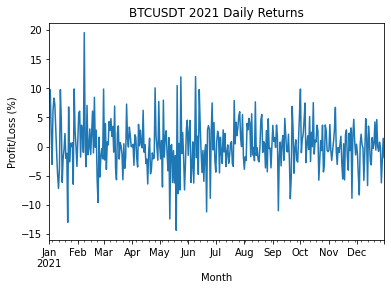

In [24]:
BTCUSDT_2021["Returns (%)"] = BTCUSDT_2021["Close"].pct_change()*100
BTCUSDT_2021["Returns (%)"].plot(
    title="BTCUSDT 2021 Daily Returns",
    xlabel="Month",
    ylabel="Profit/Loss (%)"
);

Text(0, 0.5, 'Count')

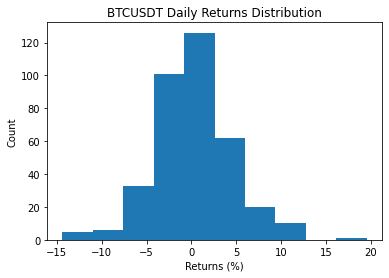

In [25]:
plt.hist(BTCUSDT_2021["Returns (%)"])
plt.title("BTCUSDT Daily Returns Distribution")
plt.xlabel('Returns (%)')
plt.ylabel("Count")

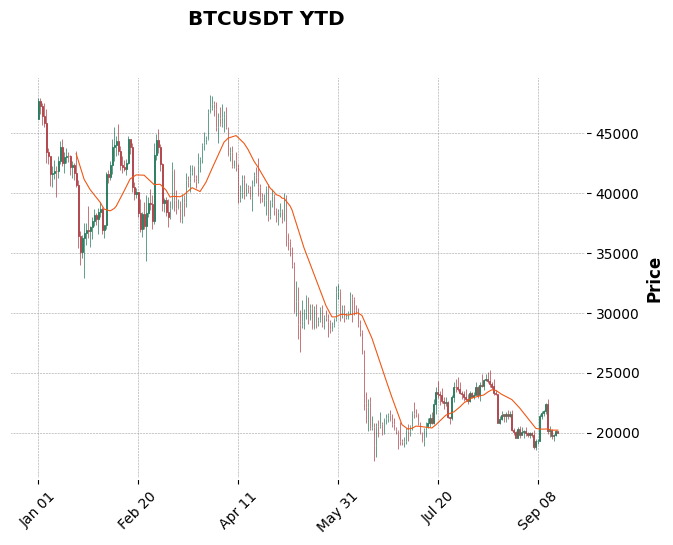

In [26]:
#Plotting BTCUSDT YTD performance with a 20 day moving average
mpf.plot(
    data=BTCUSDT_1D,
    type="candle",
    style="charles",
    title = "BTCUSDT YTD",
    mav=(20)
)

In [27]:
Close_data = BTCUSDT_1D["Close"].to_frame()

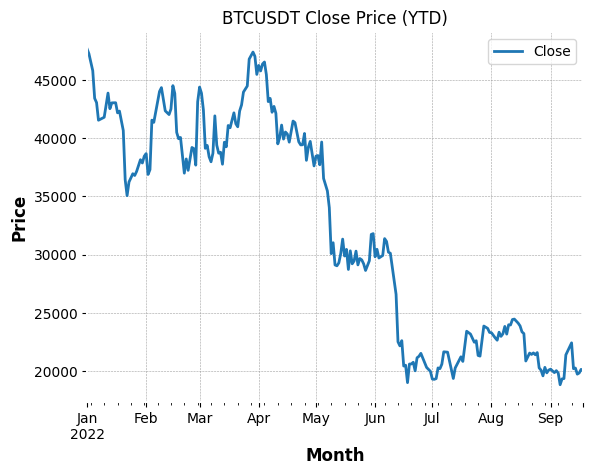

In [28]:
ax1 = Close_data.plot(
    title="BTCUSDT Close Price (YTD)",
    xlabel="Month",
    ylabel="Price"
)

In [29]:
#Plotting a more interactive chart of the Closing price
fig = px.line(
    data_frame=Close_data,
    title = "BTCUSDT Close Price (YTD)",
    labels = dict(value="Price", Date="Month")
)
fig.show()

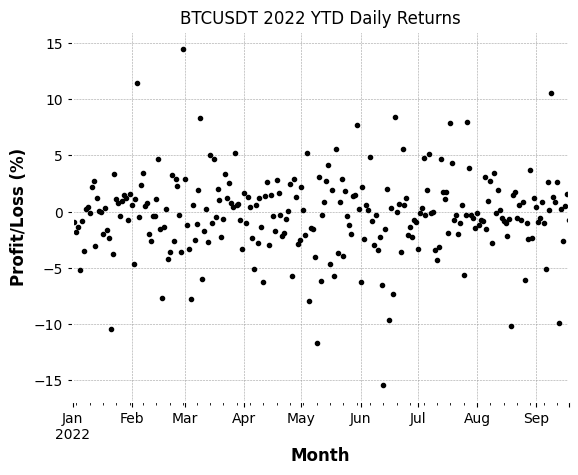

In [30]:
BTCUSDT_1D["Returns (%)"] = BTCUSDT_1D["Close"].pct_change()*100
BTCUSDT_1D["Returns (%)"].plot(
    style="k.",
    title="BTCUSDT 2022 YTD Daily Returns",
    xlabel="Month",
    ylabel="Profit/Loss (%)"
);

In [31]:
px.histogram(BTCUSDT_1D["Return (%)"], nbins=40)
fig = px.histogram(BTCUSDT_1D["Return (%)"], nbins=40,
                   title = "2022 YTD Returns Distribution",
                   labels = dict(count="Count", value="Returns (%)")
)
fig.show()

Text(0, 0.5, 'Density')

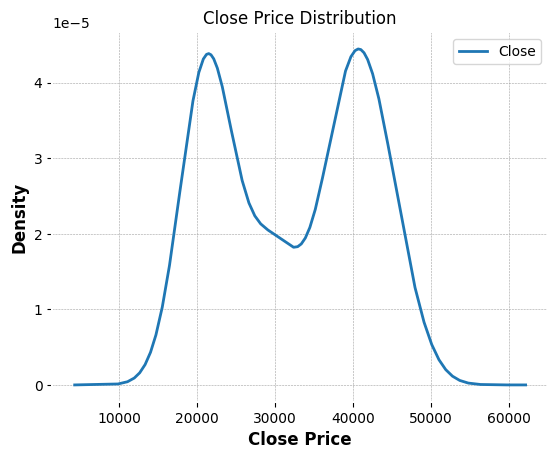

In [32]:
Close_data.plot(kind="kde")
plt.title("Close Price Distribution")
plt.xlabel('Close Price')
plt.ylabel("Density")


# **Conclusion & Observations**
This has not been the best year for the crypto market in terms. Prices are far away from their ATHs but this analysis shows that although the market has been risky and volatile, which is a core characteristic of the crypto market, there have been great chances for day traders to capitalize on. In the jurisdiction of this analysis I will be referring to BTC in particular.

* Bitcoin as dropped to as low as 18,791 USDT this year while its lowest price last year was about 29,332 USDT.
* Bitcoin's highest price this year is 19,803 USDT less than its highest price last year.
* Even with BTC's poor performance this year, the highest return in a day is not that far off from that of last year. The highest return in a day for this year is 14% while that of last year was 19%.
* The same can be said for the highest loss in a day, the differences between the two years are close at 15% for 2022 and 14% for 2021. 
* A lot of the analysed crypto currencies have their prices correlating with each other with the highest correlation of 0.88 between BTC and ETH.
* Surprising to me, the movement of ETH affect the price of BNB more that the price movement of BTC affects the price of BNB although the difference is quite small. The same can actually be said for most of the other currencies. The price movement of ETH has more effect on the other currencies than that of BTC.

In [33]:
print("Hope you found this useful")

Hope you found this useful
